<a href="https://colab.research.google.com/github/Brokerus/DS_Projects/blob/main/ML_Project_Titanic_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING PROJECT TITANIC DISASTER**

# Stage 1. Data acquisition

In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image, display
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Import the files  **test.csv** and **train.csv** and save it in a variables **test_DF** and **train_DF**

In [438]:
test_DF = pd.read_csv('/content/test.csv',index_col = 'PassengerId')
train_DF = pd.read_csv('/content/train.csv',index_col = 'PassengerId')

In [439]:
test_DF.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [440]:
train_DF.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


General information

In [441]:
test_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [442]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Let's generate descriptive statistics.

In [443]:
test_DF.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [444]:
train_DF.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Stage 2. Data preprocessing and exploratory data analysis

Let's replace the values of the "**Sex**" column with **0** for **male** and **1** for **female**.

In [445]:
test_DF['Sex'] = test_DF['Sex'].replace({'male': 0,'female': 1})
train_DF['Sex'] = train_DF['Sex'].replace({'male': 0,'female': 1})

Let's see the correlation of parameters on the heat map

<Axes: >

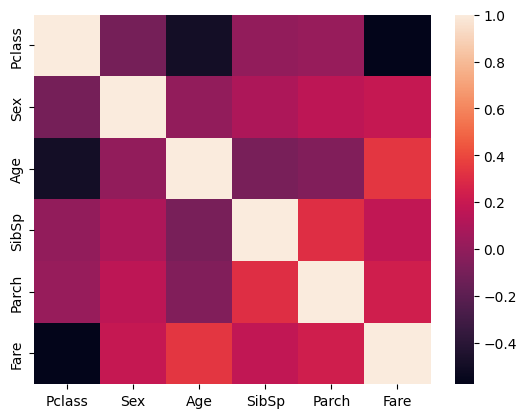

In [446]:
sns.heatmap(test_DF.corr())

<Axes: >

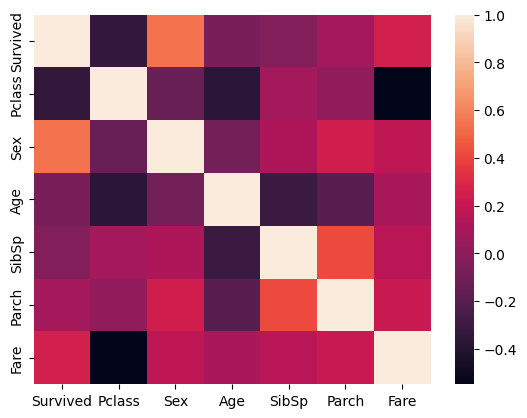

In [447]:
sns.heatmap(train_DF.corr())

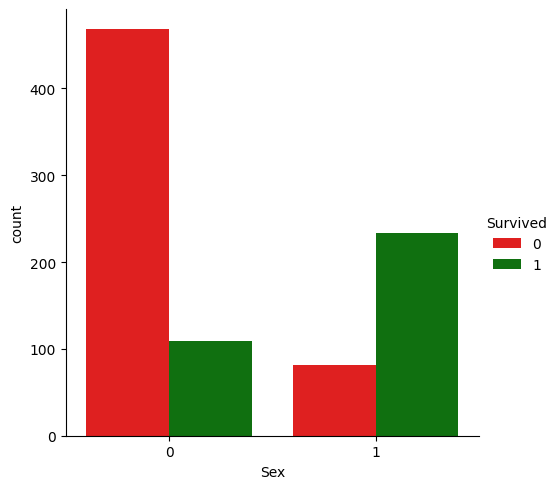

In [448]:
colors = {0:'red',1:"green"}
sns.catplot(x = 'Sex',data = train_DF, hue = 'Survived',kind = 'count',palette = colors)

**Conclusion**

The graph shows that the number of deaths of men is much higher than that of women. Gender/Sex is one of the most important survival factors.

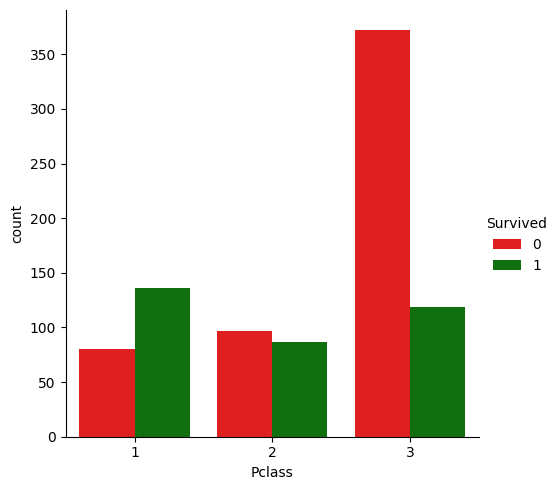

In [449]:
sns.catplot(x = 'Pclass',data = train_DF, hue = 'Survived',kind = 'count',palette = colors)

**Conclusion**

Most of the dead were from the 3rd grade. Most of the survivors were from the 1st grade.

Let's create a column for the total number of people in the family and call it **Family**.

P.S.  Not including the person himself

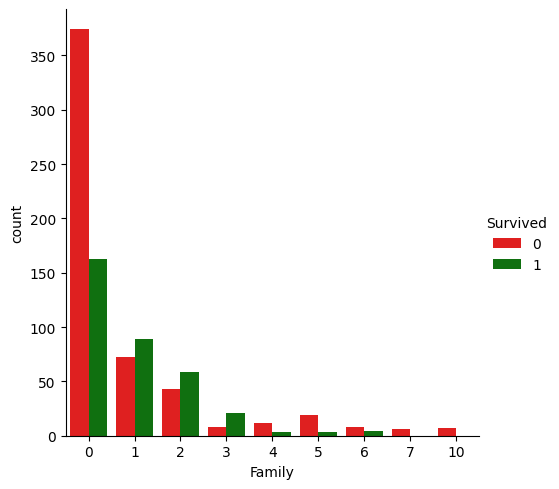

In [450]:
test_DF['Family'] = test_DF['Parch'] + test_DF['SibSp']
train_DF['Family'] = train_DF['Parch'] + train_DF['SibSp']
sns.catplot(x = 'Family',data = train_DF, hue = 'Survived',kind = 'count',palette = colors)

**Conclusion**

If there are from 1 to 3 people in the family, then the probability that a person will survive is greater.

 Removing unnecessary columns

In [451]:
unnecessary_columns = ['Name','Ticket', 'Cabin','Embarked']
test_DF_clean = test_DF.drop(columns = unnecessary_columns)
train_DF_clean = train_DF.drop(columns = unnecessary_columns)

Fill in the missing data

In [452]:
test_DF_clean['Fare'] = test_DF_clean['Fare'].fillna(test_DF_clean['Fare'].median())
test_DF_clean['Age'] = test_DF_clean['Age'].fillna(test_DF_clean['Age'].median())
train_DF_clean['Age'] = train_DF_clean['Age'].fillna(train_DF_clean['Age'].median())

In [453]:
test_DF_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
 6   Family  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


In [454]:
train_DF_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


**The data is now ready for building machine learning models!**

# Stage 3. Machine learning model

# Stage 3.1 Support Vector Classification method

Let's choose a defining column and columns for training

In [455]:
defining_column = ['Survived']
train_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Family']

In [456]:
X_train_DF_clean = train_DF_clean[train_columns]
Y_train_DF_clean = train_DF_clean[defining_column]

Let's use the linear Support Vector Classification method. Let's call the model **preliminary_model**

In [457]:
preliminary_model = svm.LinearSVC(max_iter=1000)

Train the model

In [458]:
preliminary_model.fit(X_train_DF_clean,Y_train_DF_clean.values.ravel())

LinearSVC()

Let's predict the result on the training dataset

In [459]:
preliminary_model.predict(X_train_DF_clean)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [460]:
score = preliminary_model.score(X_train_DF_clean,Y_train_DF_clean)
print(f'Estimation of determination accuracy: {score*100:.2f}%')

Estimation of determination accuracy: 79.01%


Let's similarly predict the result on the test dataset

In [461]:
X_test_DF_clean = test_DF_clean[train_columns]

In [462]:
pre_survive_test_DF = preliminary_model.predict(X_test_DF_clean)
pre_survive_test_DF

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [463]:
#test_DF_clean['Survive'] = pre_survive_test_DF

In [464]:
#test_DF_clean.head()

In [465]:
#test_DF_clean.to_csv('ML Project Titanic Disaster.csv')

# Stage 3.2 Decision trees method

## With parameters

Let's repeat some steps so as not to get confused

In [466]:
X_train_DF_clean_2 = train_DF_clean[train_columns]
Y_train_DF_clean_2 = train_DF_clean[defining_column]

Let's use the Decision Trees method. Let's call the model **preliminary_model_2**


In [467]:
preliminary_model_2 = tree.DecisionTreeClassifier()
parameters = {
    'criterion':['entropy', 'gini'],
    'max_depth': range(1,10),
    'min_samples_split': range(2,10),
    'min_samples_leaf': range(1,10)
}
grid_CV = GridSearchCV(preliminary_model_2,parameters,cv = 5)

Train the models

In [468]:
%%time
grid_CV.fit(X_train_DF_clean_2,Y_train_DF_clean_2)

CPU times: user 1min, sys: 16.2 ms, total: 1min
Wall time: 1min


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

Let's сhoosing the best model

In [469]:
preliminary_model_2 = grid_CV.best_estimator_

In [470]:
print(f'Best classifier parameters:',grid_CV.best_params_)

Best classifier parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 3}


Let's predict the result on the training dataset

In [471]:
preliminary_model_2.predict(X_train_DF_clean_2)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [472]:
score_2 = preliminary_model_2.score(X_train_DF_clean_2,Y_train_DF_clean_2)
print(f'Estimation of determination accuracy: {score_2*100:.2f}%')

Estimation of determination accuracy: 86.08%


## Visualization of the Decision Trees method

In [473]:
def visualize_DT_method(clf,X,name):
  export_graphviz(clf,feature_names = X.columns, out_file = name + '.dot', filled = True)
  # use the exclamation mark to call the terminal
  !dot -Tpng {name}.dot -o {name}.png
  display(Image(filename=name + '.png'))

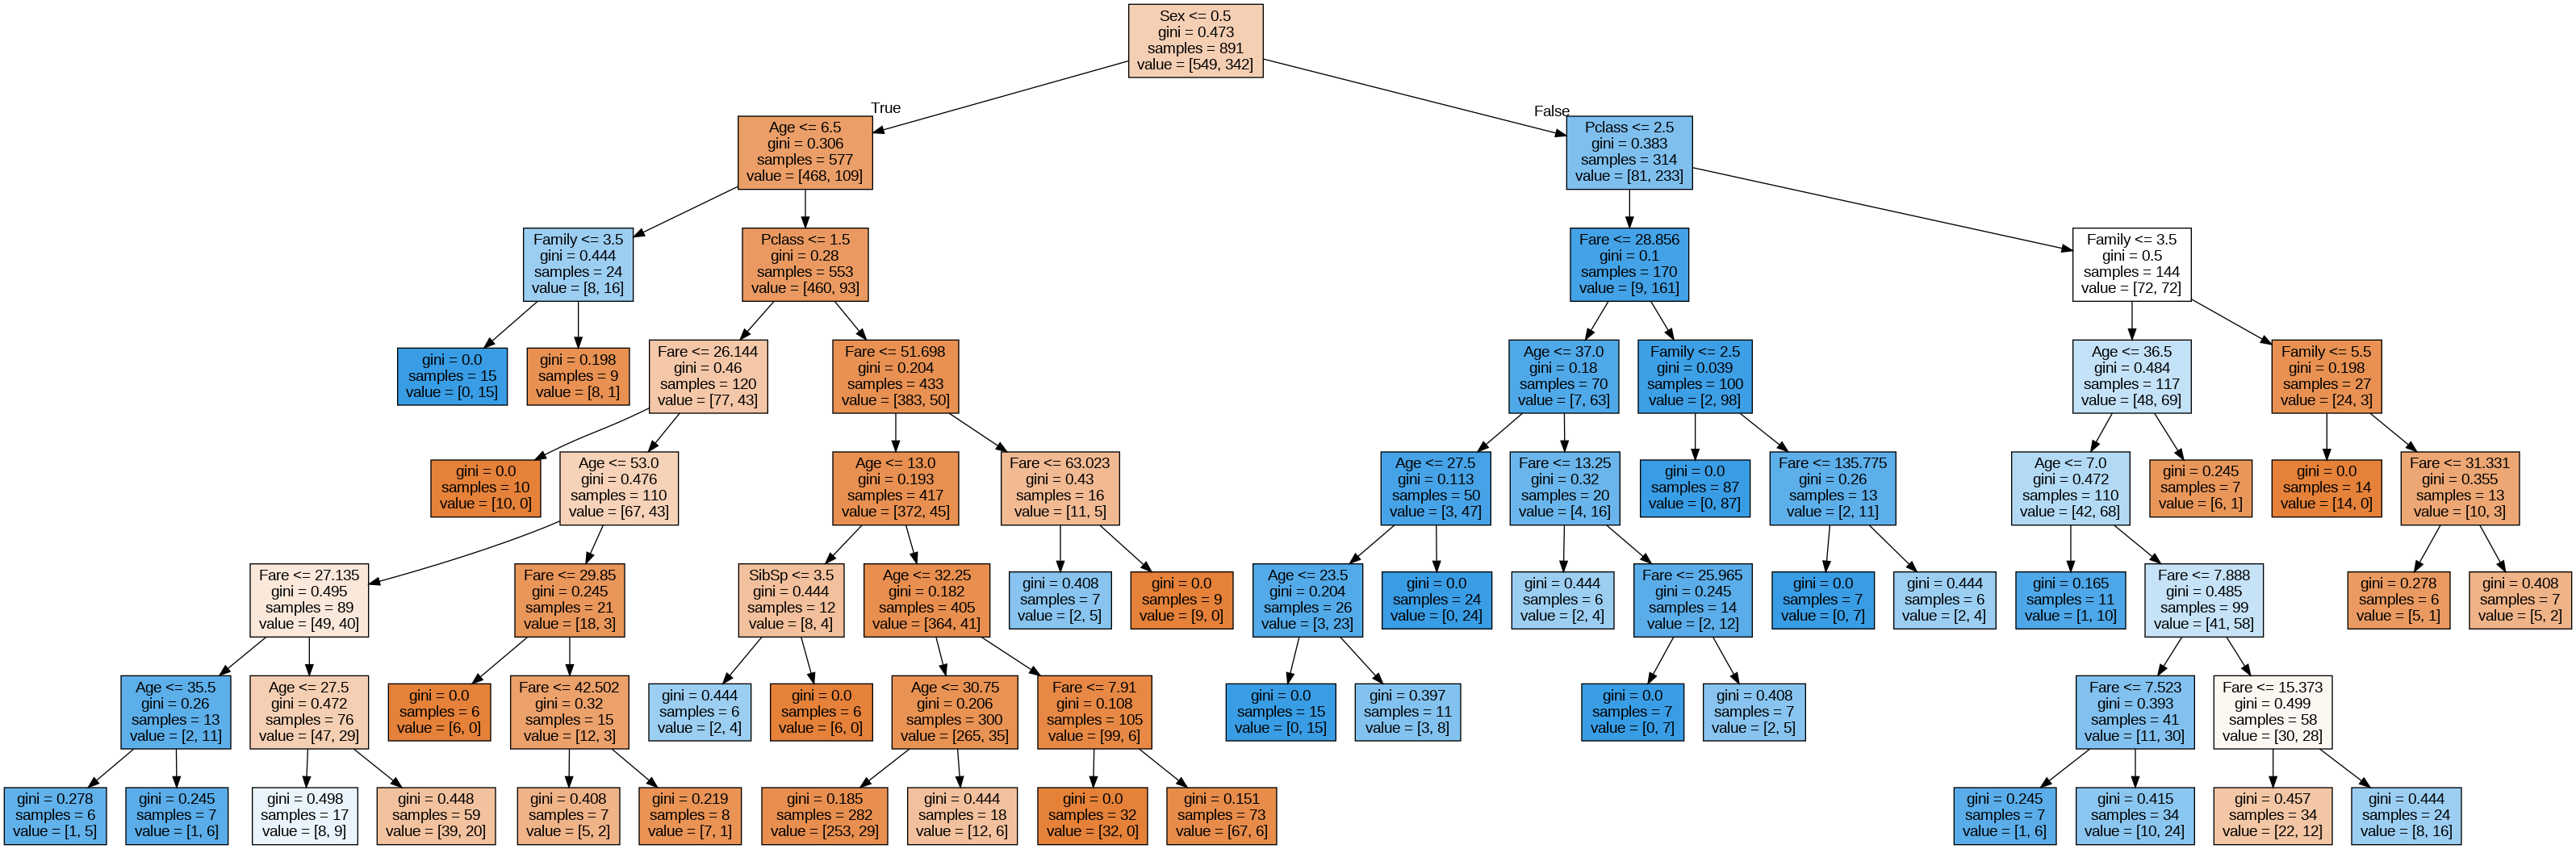

In [474]:
visualize_DT_method(preliminary_model_2,X_train_DF_clean_2,'tree');

Let's similarly predict the result on the test dataset

In [475]:
X_test_DF_clean_2 = test_DF_clean[train_columns]

In [476]:
pre_survive_test_DF_2 = preliminary_model_2.predict(X_test_DF_clean_2)
pre_survive_test_DF_2

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [477]:
test_DF_clean['Survived'] = pre_survive_test_DF_2

In [478]:
test_DF_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Survived
PassengerId,,,,,,,,
892,3,0,34.5,0,0,7.8292,0,0
893,3,1,47.0,1,0,7.0000,1,0
894,2,0,62.0,0,0,9.6875,0,0
895,3,0,27.0,0,0,8.6625,0,0
896,3,1,22.0,1,1,12.2875,2,0


In [479]:
test_DF_clean.to_csv('ML Project Titanic Disaster_2.csv')

## Without parameters

In [480]:
X_train_DF_clean_3 = train_DF_clean[train_columns]
Y_train_DF_clean_3 = train_DF_clean[defining_column]

Let's use the Decision Trees method. Let's call the model **preliminary_model_3**

In [481]:
preliminary_model_3 = tree.DecisionTreeClassifier()

In [482]:
preliminary_model_3.fit(X_train_DF_clean_3,Y_train_DF_clean_3)

DecisionTreeClassifier()

In [483]:
preliminary_model_3.predict(X_train_DF_clean_3)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [484]:
score_3 = preliminary_model_3.score(X_train_DF_clean_3,Y_train_DF_clean_3)
print(f'Estimation of determination accuracy: {score_3*100:.2f}%')

Estimation of determination accuracy: 97.98%


In [485]:
X_test_DF_clean_3 = test_DF_clean[train_columns]

In [486]:
pre_survive_test_DF_3 = preliminary_model_3.predict(X_test_DF_clean_3)
pre_survive_test_DF_3

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [487]:
test_DF_clean['Survived'] = pre_survive_test_DF_2

In [488]:
test_DF_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Survived
PassengerId,,,,,,,,
892,3,0,34.5,0,0,7.8292,0,0
893,3,1,47.0,1,0,7.0000,1,0
894,2,0,62.0,0,0,9.6875,0,0
895,3,0,27.0,0,0,8.6625,0,0
896,3,1,22.0,1,1,12.2875,2,0


# The Result


In [489]:
print(f'Precision of the Support Vector Classification method: {score*100:.2f}%')
print(f'Precision of the Decision Trees method with parameters: {score_2*100:.2f}%')
print(f'Precision of the Decision Trees method: {score_3*100:.2f}%')

Precision of the Support Vector Classification method: 79.01%
Precision of the Decision Trees method with parameters: 86.08%
Precision of the Decision Trees method: 97.98%
